In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Load the data
coral = pd.read_csv('/users/mehr/desktop/data/coral.csv')

first_list=['Sample_ID','Cyclone_Frequency','Depth_m','ClimSST',
        'Ocean_Name','Country_Name','Distance_to_Shore','Exposure',
        'Turbidity','Date_Year','Bleaching_Level','Temperature_Maximum','SSTA'
        'Percent_Bleaching','Temperature_Mean','Realm_Name','Percent_Cover']

to_keep=['Sample_ID','Cyclone_Frequency','Depth_m','ClimSST',
        'Ocean_Name','Country_Name','Distance_to_Shore','Exposure',
        'Turbidity','Date_Year','Bleaching_Level','Temperature_Maximum','SSTA','TSA',
        'Percent_Bleaching','Temperature_Mean','Realm_Name','Percent_Cover']
coral=coral[to_keep]
#print(coral.info())
coral=coral.replace("nd", pd.NA)
#coral_end=coral.sample(15000)
#coral_end.info()
#coral_end.to_csv('/users/mehr/desktop/data/coral_end.csv',index=False)
coral.columns
coral['Bleaching_Level'].fillna("Colony", inplace=True)
#coral.info()
num_rows_before = coral.shape[0]
#coral = coral.dropna()
num_rows_after = coral.shape[0]

num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")
coral.head()


/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_65080/2428871339.py:9: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  coral = pd.read_csv('/users/mehr/desktop/data/coral.csv')
/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_65080/2428871339.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  coral['Bleaching_Level'].fillna("Colony", inplace=True)


Number of rows dropped: 0


Sample_ID  Cyclone_Frequency Depth_m ClimSST Ocean_Name      Country_Name  \
0   10324336              49.90      10  301.61   Atlantic              Cuba   
1   10324754              51.20      14  262.15    Pacific  French Polynesia   
2   10323866              61.52       7  298.79   Atlantic    United Kingdom   
3   10328028              65.39    9.02  300.16   Atlantic     United States   
4   10328029              65.39   12.50  300.15   Atlantic     United States   

  Distance_to_Shore Exposure Turbidity  Date_Year Bleaching_Level  \
0           8519.23  Exposed    0.0287       2005          Colony   
1           1431.62  Exposed    0.0262       1991          Colony   
2            182.33  Exposed    0.0429       2006          Colony   
3            313.13  Exposed    0.0424       2006          Colony   
4             792.0  Exposed    0.0424       2006          Colony   

  Temperature_Maximum   SSTA    TSA Percent_Bleaching Temperature_Mean  \
0              304.69  -0.46   -0.8              50.2           300.67   
1              305.01   1.29   1.29              50.7           300.73   
2              304.14   0.04  -2.64              50.9           300.32   
3              304.07  -0.07  -2.27              50.9           300.38   
4              303.76      0  -2.19              50.9           300.38   

             Realm_Name Percent_Cover  
0     Tropical Atlantic          <NA>  
1  Eastern Indo-Pacific          <NA>  
2     Tropical Atlantic          <NA>  
3     Tropical Atlantic          <NA>  
4     Tropical Atlantic          <NA>

In [105]:
#coral=coral.replace("nd", pd.NA)
#coral["Bleaching_Level"].str.replace("", np.nan)
#print(type(coral.loc[2,"Bleaching_Level"]))

#coral["Bleaching_Level"] = coral["Bleaching_Level"].apply(lambda x: np.nan if x == "" else x)
#coral=coral.replace("", pd.NA)
#coral.to_csv('/users/mehr/desktop/data/coral_whole.csv',index=False)

#import scipy.stats as stat
#coral['Distance_to_Shore'] = pd.to_numeric(coral['Distance_to_Shore'], errors='coerce')
#coral['Percent_Bleaching'] = pd.to_numeric(coral['Percent_Bleaching'], errors='coerce')
#coral = coral.dropna()
#plt.xlim(left=0, right=30000)
#sns.scatterplot(x='Distance_to_Shore', y='Percent_Bleaching',hue='Exposure',data=coral,alpha=.5)   

In [106]:
import pandas as pd
import numpy as np

# Function to calculate the percentage of outliers in a Series
def percent_outliers(s):
    if np.issubdtype(s.dtype, np.number):
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        return ((s < (q1 - 1.5 * iqr)) | (s > (q3 + 1.5 * iqr))).mean() * 100
    else:
        return np.nan

# Apply the function to each column of the DataFrame
outlier_percent = coral.apply(percent_outliers)

# Print the result
print(outlier_percent)

Sample_ID              8.162278
Cyclone_Frequency      4.472813
Depth_m                     NaN
ClimSST                     NaN
Ocean_Name                  NaN
Country_Name                NaN
Distance_to_Shore           NaN
Exposure                    NaN
Turbidity                   NaN
Date_Year              0.207925
Bleaching_Level             NaN
Temperature_Maximum         NaN
SSTA                        NaN
TSA                         NaN
Percent_Bleaching           NaN
Temperature_Mean            NaN
Realm_Name                  NaN
Percent_Cover               NaN
dtype: float64


<Axes: >

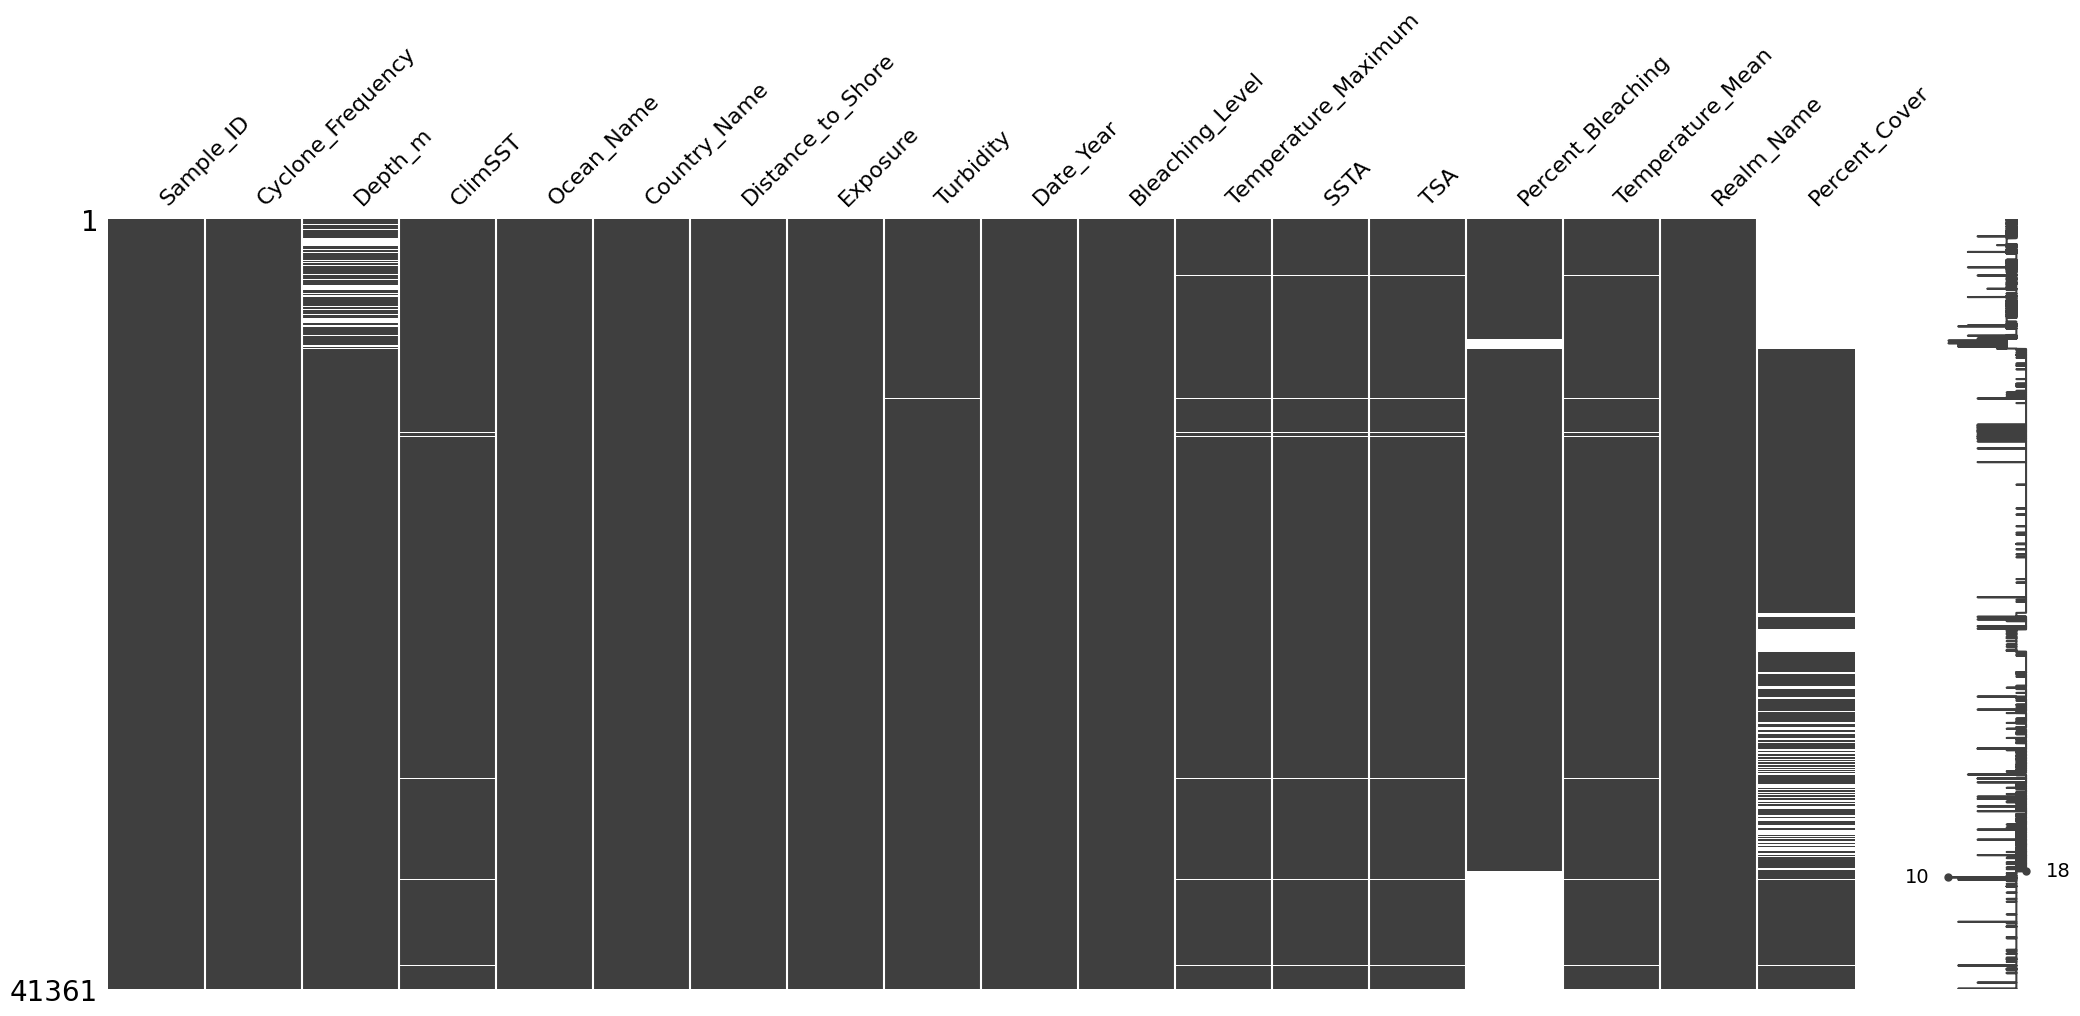

In [107]:
#coral.dropna(inplace=True)
msno.matrix(coral)

In [108]:
import warnings
warnings.filterwarnings('ignore')
#coral.loc[10000:10010,"Percent_Cover"]
#percent_missing=
#coral.isnull().mean()*100
coral["Percent_Cover"] = pd.to_numeric(coral["Percent_Cover"], errors='coerce')
coral["Percent_Cover"]=coral["Percent_Cover"].fillna(coral["Percent_Cover"].median())

coral["Depth_m"] = pd.to_numeric(coral["Depth_m"], errors='coerce')
coral["Depth_m"].fillna(coral["Depth_m"].median(), inplace=True) 

coral["Cyclone_Frequency"] =pd.to_numeric(coral["Cyclone_Frequency"], errors="coerce")
coral["Cyclone_Frequency"].fillna(coral["Cyclone_Frequency"].median(), inplace=True)

coral["ClimSST"] = pd.to_numeric(coral["ClimSST"], errors='coerce')
coral["ClimSST"].fillna(coral["ClimSST"].median(), inplace=True)

coral["Distance_to_Shore"] = pd.to_numeric(coral["Distance_to_Shore"], errors='coerce')
coral["Distance_to_Shore"].fillna(coral["Distance_to_Shore"].median(), inplace=True)

coral["Turbidity"] = pd.to_numeric(coral["Turbidity"], errors='coerce')
coral["Turbidity"].fillna(coral["Turbidity"].median(), inplace=True)

coral["Temperature_Maximum"] = pd.to_numeric(coral["Temperature_Maximum"], errors='coerce')
coral["Temperature_Maximum"].fillna(coral["Temperature_Maximum"].median(), inplace=True)

coral["Temperature_Mean"] = pd.to_numeric(coral["Temperature_Mean"], errors='coerce')
coral["Temperature_Mean"].fillna(coral["Temperature_Mean"].median(), inplace=True)

coral["SSTA"]=pd.to_numeric(coral["SSTA"], errors="coerce")
coral["SSTA"].fillna(coral["SSTA"].median(), inplace=True)

coral["TSA"]=pd.to_numeric(coral["TSA"], errors="coerce")
coral["TSA"].fillna(coral["TSA"].median(), inplace=True)


coral.dropna(inplace=True)

<Axes: >

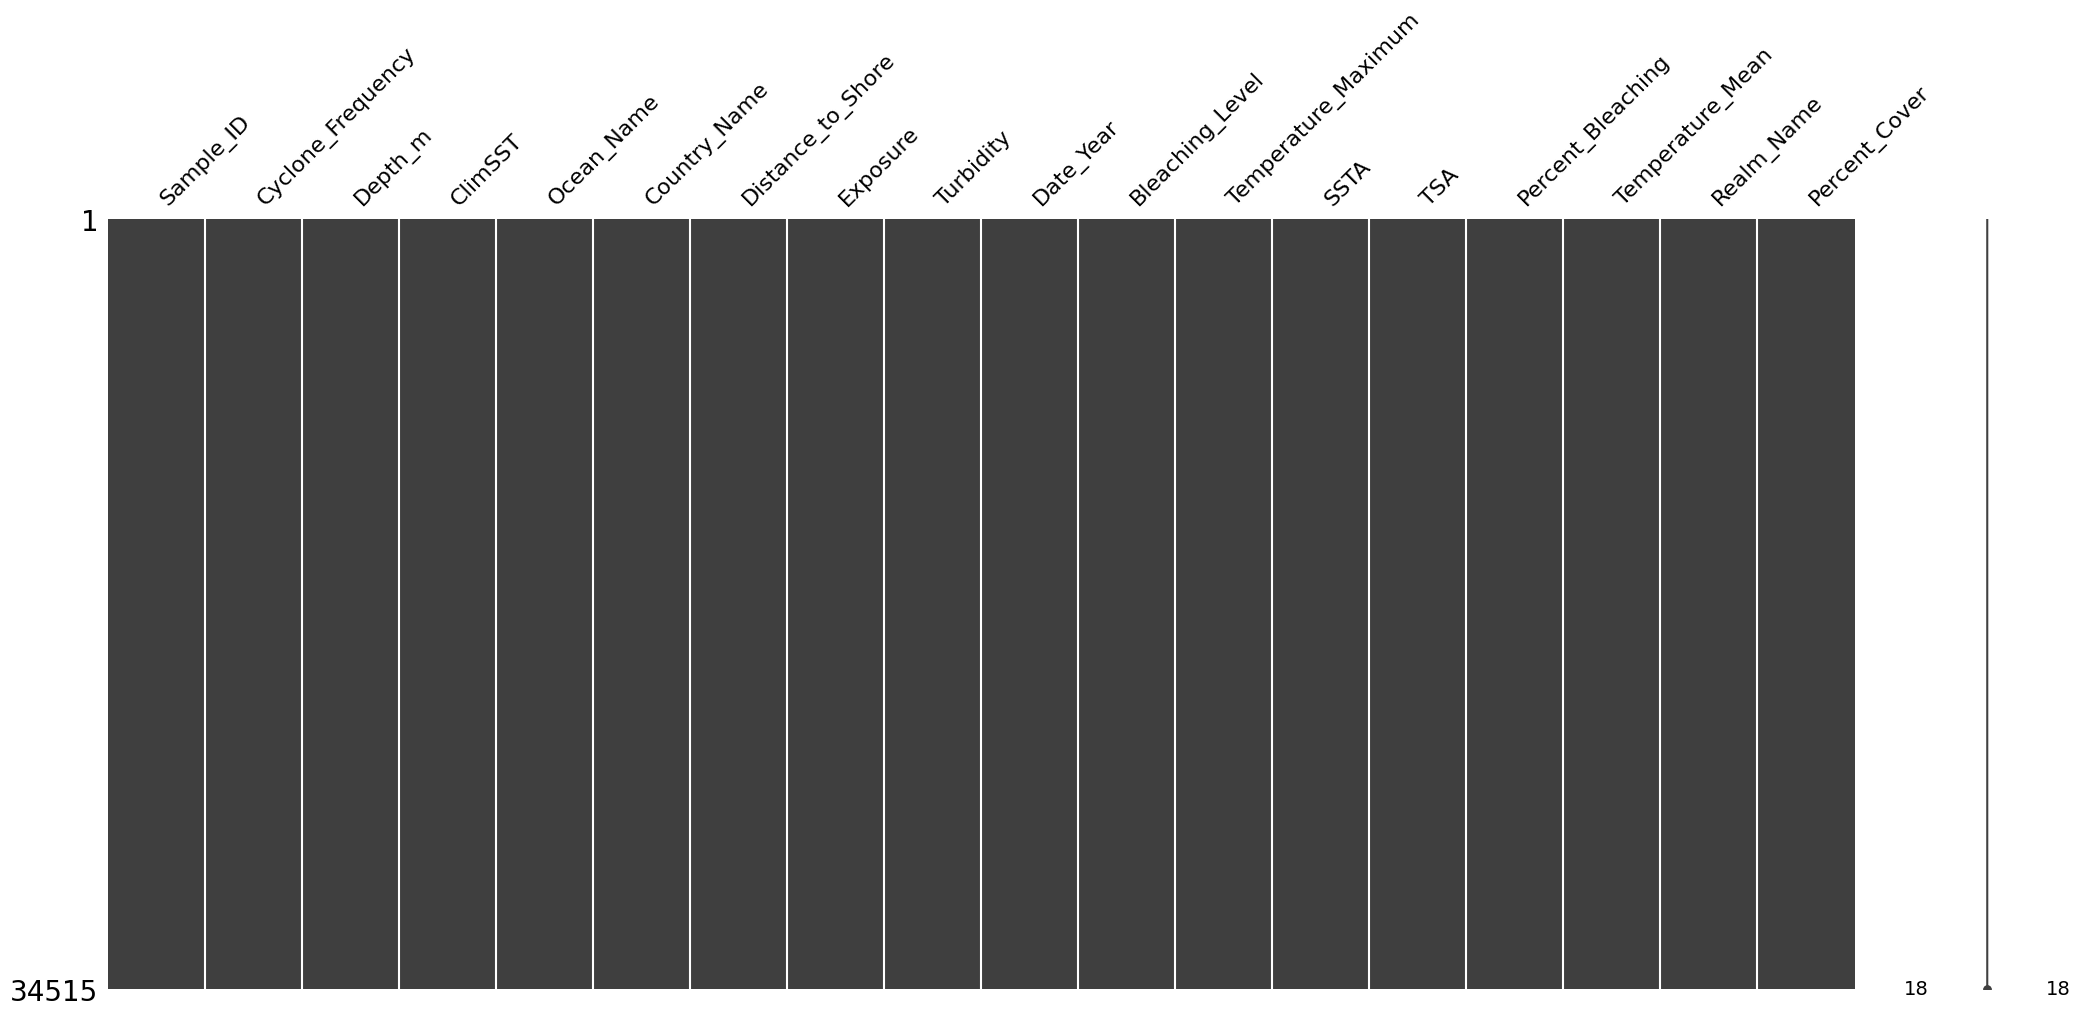

In [109]:
msno.matrix(coral)

In [110]:
try: 
    coral['Cyclone_Frequency'] = coral['Cyclone_Frequency'].astype(float)
    coral['Depth_m'] = coral['Depth_m'].astype(float)
    coral['ClimSST'] = coral['ClimSST'].astype(float)
    coral['Ocean_Name'] = coral['Ocean_Name'].astype('category')
    coral['Country_Name'] = coral['Country_Name'].astype('category')
    coral['Distance_to_Shore'] = coral['Distance_to_Shore'].astype(float)
    coral['Exposure'] = coral['Exposure'].astype('category')
    coral['Turbidity'] = coral['Turbidity'].astype(float)
    coral['Date_Year'] = coral['Date_Year'].astype('category')
    coral['Percent_Bleaching'] = coral['Percent_Bleaching'].astype(float)
    coral['Temperature_Mean'] = coral['Temperature_Mean'].astype(float)
    coral['Realm_Name'] = coral['Realm_Name'].astype('category')
    coral['Percent_Cover'] = coral['Percent_Cover'].astype(float)
    coral['Bleaching_Level']=coral['Bleaching_Level'].astype('category')
    coral['Temperature_Maximum']=coral['Temperature_Maximum'].astype(float)
    coral['SSTA']=coral['SSTA'].astype(float)
    coral['TSA']=coral['TSA'].astype(float)
    coral['Sample_ID']=coral['Sample_ID'].astype(int)
    #coral['exposed'] = coral['Exposure'].cat.rename_categories({'Exposed': '1', 'Sheltered': '0','Sometimes':''})
    coral.info()
except ValueError as e:
    print(e)

<class 'pandas.core.frame.DataFrame'>
Index: 34515 entries, 0 to 35044
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sample_ID            34515 non-null  int64   
 1   Cyclone_Frequency    34515 non-null  float64 
 2   Depth_m              34515 non-null  float64 
 3   ClimSST              34515 non-null  float64 
 4   Ocean_Name           34515 non-null  category
 5   Country_Name         34515 non-null  category
 6   Distance_to_Shore    34515 non-null  float64 
 7   Exposure             34515 non-null  category
 8   Turbidity            34515 non-null  float64 
 9   Date_Year            34515 non-null  category
 10  Bleaching_Level      34515 non-null  category
 11  Temperature_Maximum  34515 non-null  float64 
 12  SSTA                 34515 non-null  float64 
 13  TSA                  34515 non-null  float64 
 14  Percent_Bleaching    34515 non-null  float64 
 15  Temperature_Mean     345

In [111]:
#coral.select_dtypes(include=['category']).cat.codes
# categorical_columns = coral.select_dtypes(include=['category']).columns
# coral[categorical_columns] = coral[categorical_columns].apply(lambda x: x.cat.codes)

#cor=coral.sample(20000)
#cor.to_csv('/users/mehr/desktop/data/coral_end.csv',index=False)
#cor.select_dtypes(include=['number']).columns

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

def normality_check_plots(df):
    columns = df.select_dtypes(include=['number']).columns
    fig, ax = plt.subplots(len(columns), 3, figsize=(15, 5*len(columns)))

    for i, col in enumerate(columns):
    # Visualize the distribution
        sns.histplot(df[col], ax=ax[i, 0])
        ax[i, 0].set_title(f'Distribution plot of {col}')

    # Boxplot
        sns.boxplot(x=df[col], ax=ax[i, 1])
        ax[i, 1].set_title(f'Boxplot plot of {col}')
    # QQ plot
        sm.qqplot(df[col], line='s', ax=ax[i, 2])
        ax[i, 2].set_title(f'QQ Plot of {col}')
        plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.show()
#normality_check_plots(cor)

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

def normality(df):
    """
    This function checks the normality of a DataFrame and identifies outliers.

    Args:
        df (pandas.DataFrame): The DataFrame to be checked.

    Returns:
        None
    """
    columns=df.select_dtypes(include=['number']).columns

    for col in columns:
        # Report outliers
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + (1.5 * iqr)
        lower_bound = q1 - (1.5 * iqr)
        
        df_num=len(df)
        print("upperbound :",upper_bound, "     and lowerbound ", lower_bound)
        print(f'Number of outliers in {col}: {len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])}')
        df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
        df_num_after_clean=len(df)
        print(f'Number of outliers after cleaning {col}: {len(df[(df[col] > lower_bound) | (df[col] < upper_bound)])}')
        print("df is : ",len(df),"cleanesd: ",len(df), "the difference is :  ", df_num_after_clean-df_num)
        print(60*"*")
        #df.info()
    return df

def remove_duplicate(data):
    print(data.count())
    data.sort_values(by=['Sample_ID','Percent_Cover'],ascending=[True,False])
    coral_unduped=coral.drop_duplicates(subset='Sample_ID',keep='first')
    print(data.count()-coral_unduped.count()) 
    return coral_unduped
    
coral=remove_duplicate(coral)
coral.to_csv('/users/mehr/desktop/data/coral_undup.csv',index=False)
#normality_check_plots(coral)
#normality_check_plots(normality(coral))
#coral=normality(coral)

Sample_ID              34515
Cyclone_Frequency      34515
Depth_m                34515
ClimSST                34515
Ocean_Name             34515
Country_Name           34515
Distance_to_Shore      34515
Exposure               34515
Turbidity              34515
Date_Year              34515
Bleaching_Level        34515
Temperature_Maximum    34515
SSTA                   34515
TSA                    34515
Percent_Bleaching      34515
Temperature_Mean       34515
Realm_Name             34515
Percent_Cover          34515
dtype: int64
Sample_ID              11244
Cyclone_Frequency      11244
Depth_m                11244
ClimSST                11244
Ocean_Name             11244
Country_Name           11244
Distance_to_Shore      11244
Exposure               11244
Turbidity              11244
Date_Year              11244
Bleaching_Level        11244
Temperature_Maximum    11244
SSTA                   11244
TSA                    11244
Percent_Bleaching      11244
Temperature_Mean       11244
R

In [114]:
#coral.to_csv('/users/mehr/desktop/data/coral_end.csv',index=False)

In [115]:
coral.head()

Sample_ID  Cyclone_Frequency  Depth_m  ClimSST Ocean_Name  \
0   10324336              49.90    10.00   301.61   Atlantic   
1   10324754              51.20    14.00   262.15    Pacific   
2   10323866              61.52     7.00   298.79   Atlantic   
3   10328028              65.39     9.02   300.16   Atlantic   
4   10328029              65.39    12.50   300.15   Atlantic   

       Country_Name  Distance_to_Shore Exposure  Turbidity Date_Year  \
0              Cuba            8519.23  Exposed     0.0287      2005   
1  French Polynesia            1431.62  Exposed     0.0262      1991   
2    United Kingdom             182.33  Exposed     0.0429      2006   
3     United States             313.13  Exposed     0.0424      2006   
4     United States             792.00  Exposed     0.0424      2006   

  Bleaching_Level  Temperature_Maximum  SSTA   TSA  Percent_Bleaching  \
0          Colony               304.69 -0.46 -0.80               50.2   
1          Colony               305.01  1.29  1.29               50.7   
2          Colony               304.14  0.04 -2.64               50.9   
3          Colony               304.07 -0.07 -2.27               50.9   
4          Colony               303.76  0.00 -2.19               50.9   

   Temperature_Mean            Realm_Name  Percent_Cover  
0            300.67     Tropical Atlantic           12.5  
1            300.73  Eastern Indo-Pacific           12.5  
2            300.32     Tropical Atlantic           12.5  
3            300.38     Tropical Atlantic           12.5  
4            300.38     Tropical Atlantic           12.5

group_names=["0-5","5-10","10-15","15-20"]
coral['new_column']=pd.cut(coral['Depth_m'],4,labels=group_names) # Creates 5 bins based on quantiles
coral['new_column'].value_counts()  

<Axes: xlabel='ClimSST', ylabel='Count'>

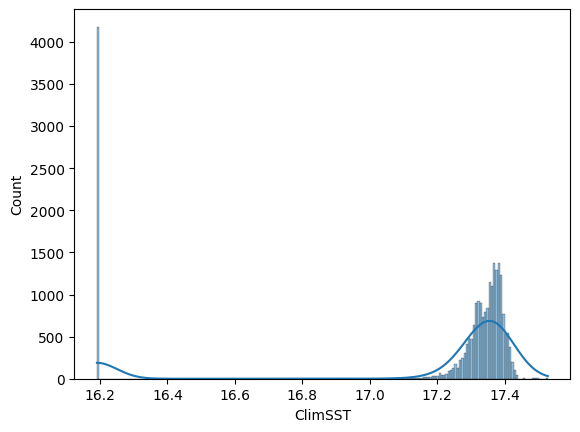

In [116]:
#How is coral coverage is connected to distance to shore?
#coral.plot(kind='scatter', x='Distance_to_Shore', y='Percent_Cover', alpha=0.2)
#np.log(coral.ClimSST)
sns.histplot(np.sqrt(coral.ClimSST), kde=True)
#coral.ClimSST.plot(kind='hist', bins=15, alpha=0.5)


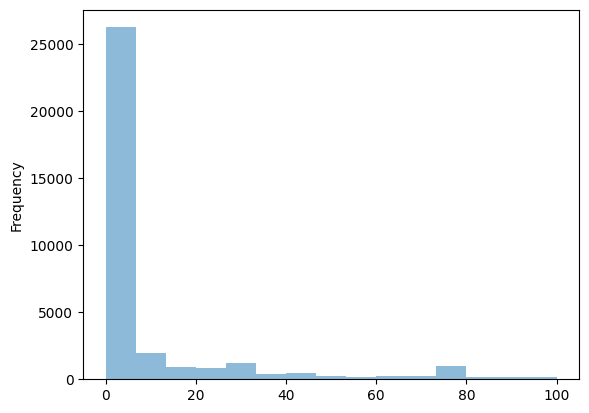

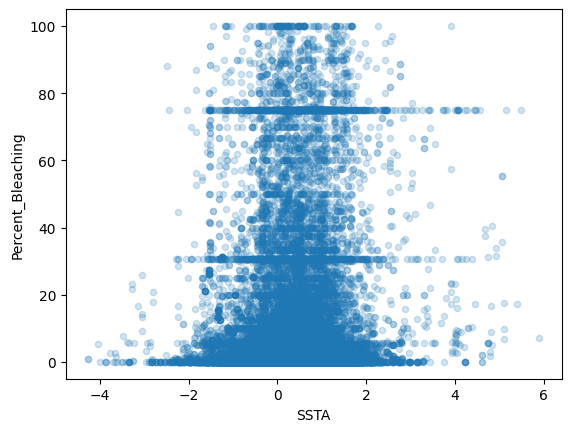

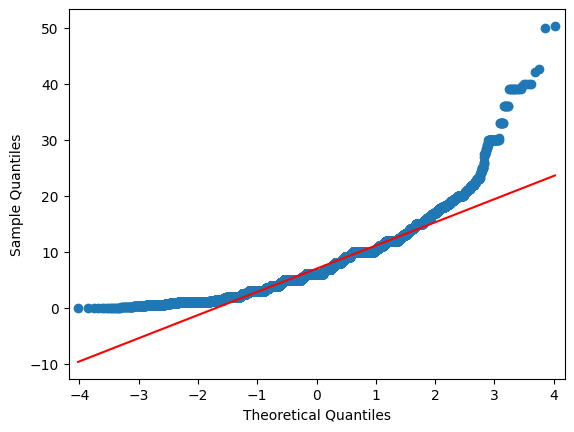

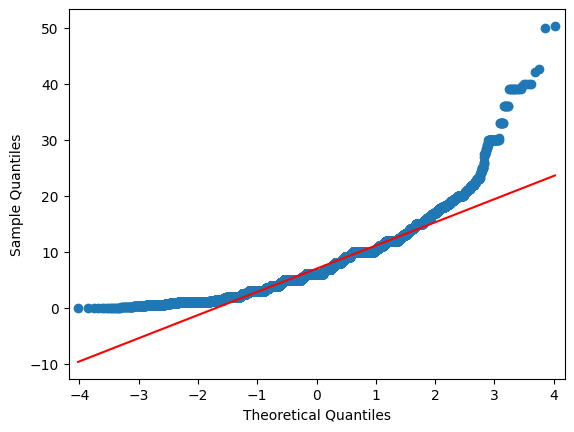

In [117]:
coral_cleaned=pd.read_csv('/users/mehr/desktop/data/coral_cleaned.csv')

numeric_columns = coral_cleaned.select_dtypes(include=['number'])

#coral_cleaned['Percent_Bleaching']=coral_cleaned['Percent_Bleaching']**(1/9)
#corret2=np.log(numeric_columns).corr()['Percent_Bleaching']
#corret[abs(corret)>.3]
coral_cleaned['Percent_Bleaching'].plot(kind='hist', bins=15, alpha=0.5)
plt.show()
#coral_cleaned['TSA'].plot(kind='hist', bins=15, alpha=0.5)
coral_cleaned['TSA']=np.log(coral_cleaned['TSA'])
plt.show()
coral_cleaned.plot(kind='scatter', x='SSTA', y='Percent_Bleaching', alpha=0.2)
#transformed_columns = numeric_columns.apply(lambda x:np.log(x)) #x**(1/10))
transformed_columns=numeric_columns.transform(lambda x: x)
correlation = pd.DataFrame(transformed_columns.corr())

# Print the correlation values
correlation['Percent_Bleaching']
plt.show()

sm.qqplot(coral_cleaned['Depth_m'], line='s')
#sns.catplot(x=top_countries, y='Percent_Bleaching', data=coral_cleaned, kind='box')

In [118]:
coral.head()

Sample_ID  Cyclone_Frequency  Depth_m  ClimSST Ocean_Name  \
0   10324336              49.90    10.00   301.61   Atlantic   
1   10324754              51.20    14.00   262.15    Pacific   
2   10323866              61.52     7.00   298.79   Atlantic   
3   10328028              65.39     9.02   300.16   Atlantic   
4   10328029              65.39    12.50   300.15   Atlantic   

       Country_Name  Distance_to_Shore Exposure  Turbidity Date_Year  \
0              Cuba            8519.23  Exposed     0.0287      2005   
1  French Polynesia            1431.62  Exposed     0.0262      1991   
2    United Kingdom             182.33  Exposed     0.0429      2006   
3     United States             313.13  Exposed     0.0424      2006   
4     United States             792.00  Exposed     0.0424      2006   

  Bleaching_Level  Temperature_Maximum  SSTA   TSA  Percent_Bleaching  \
0          Colony               304.69 -0.46 -0.80               50.2   
1          Colony               305.01  1.29  1.29               50.7   
2          Colony               304.14  0.04 -2.64               50.9   
3          Colony               304.07 -0.07 -2.27               50.9   
4          Colony               303.76  0.00 -2.19               50.9   

   Temperature_Mean            Realm_Name  Percent_Cover  
0            300.67     Tropical Atlantic           12.5  
1            300.73  Eastern Indo-Pacific           12.5  
2            300.32     Tropical Atlantic           12.5  
3            300.38     Tropical Atlantic           12.5  
4            300.38     Tropical Atlantic           12.5

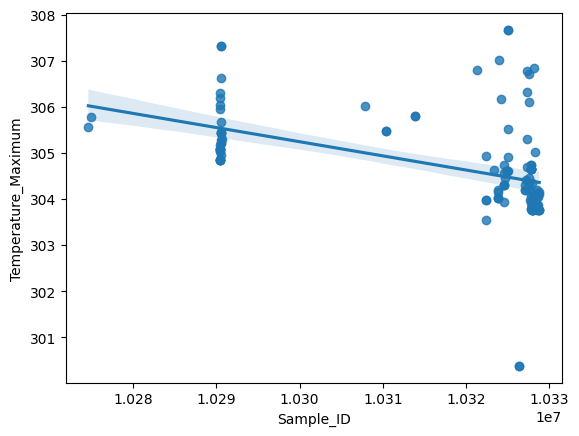

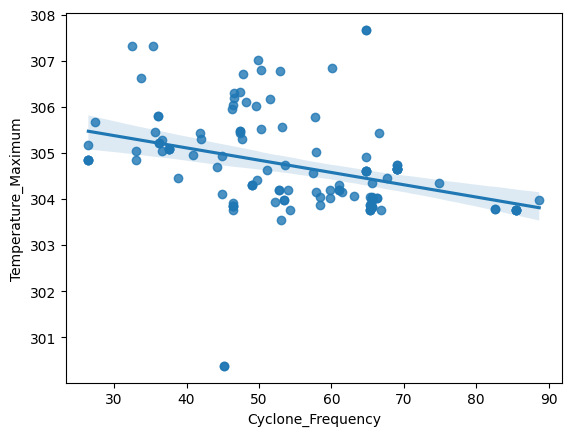

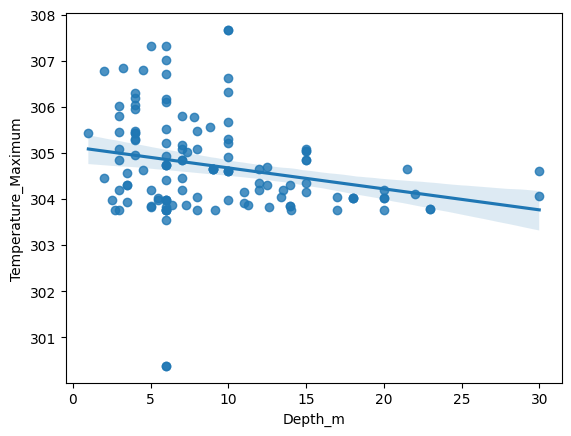

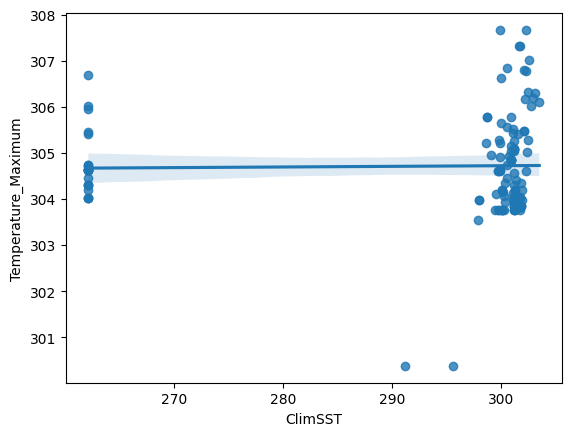

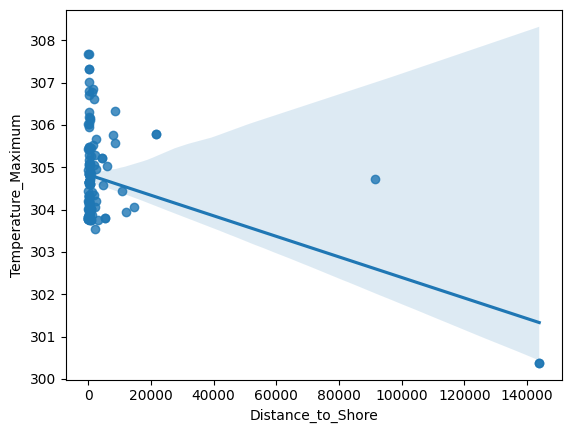

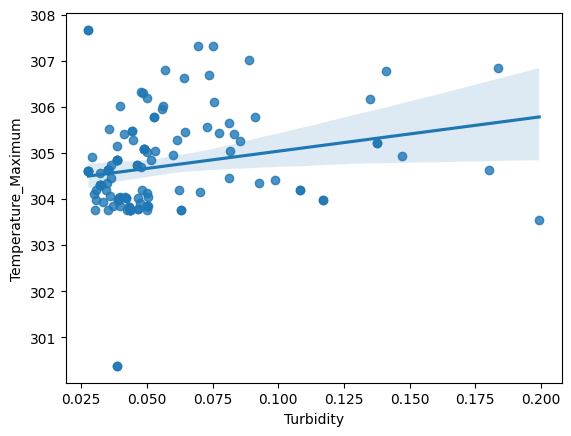

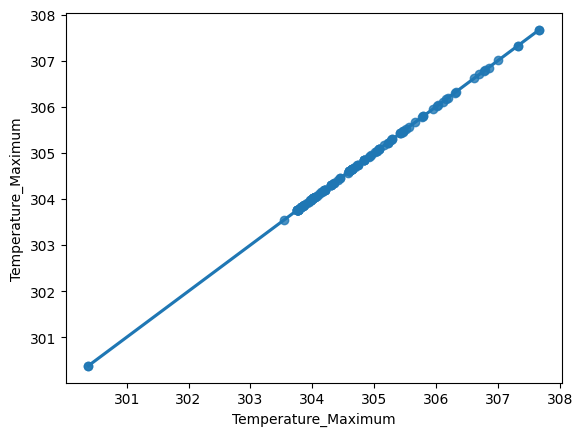

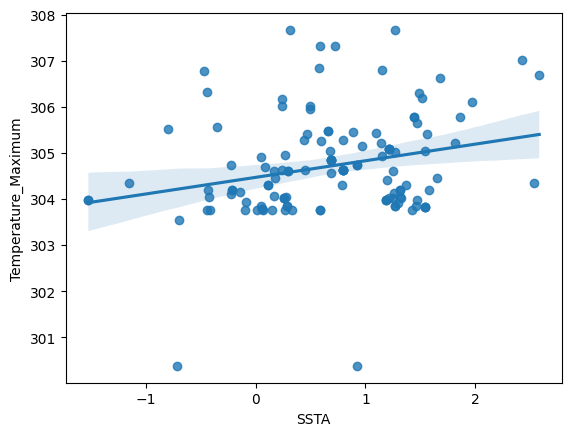

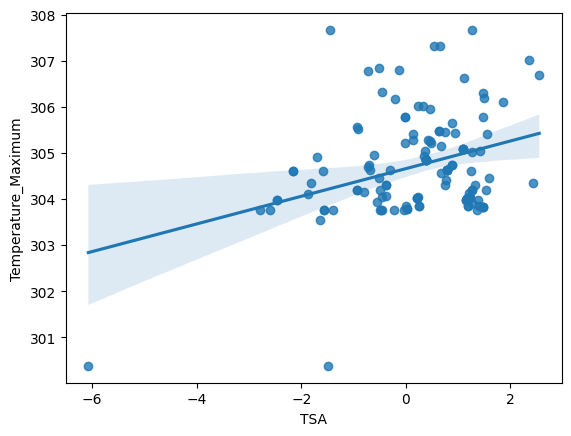

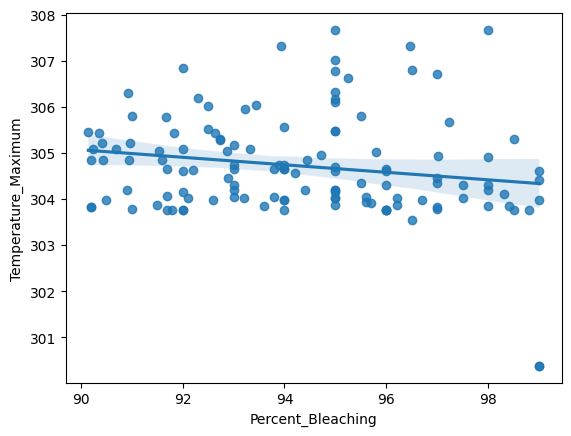

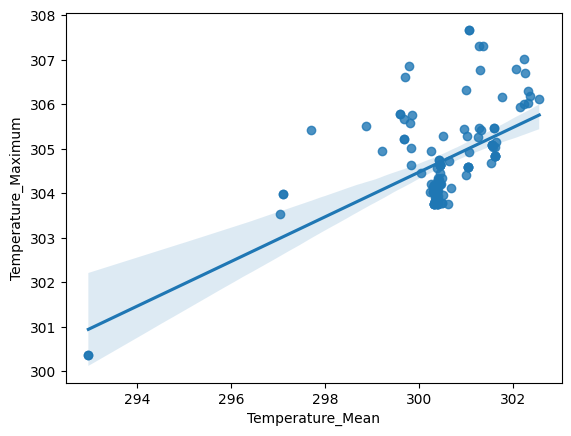

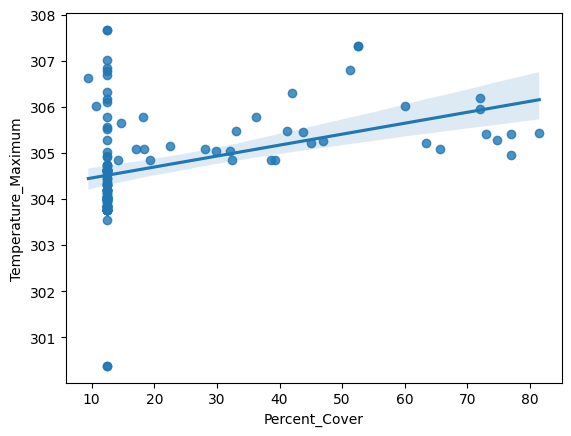

In [119]:
categ=coral.select_dtypes(include=['category']).columns.drop(['Date_Year','Country_Name'])

coral_scenario=coral.copy()
coral_scenario=coral_scenario[( coral_scenario['Percent_Bleaching'] < 100) & ( coral_scenario['Percent_Bleaching']>90)  ]
for col in coral.select_dtypes(include=['number']).columns:
    #for cat in categ:
    sns.regplot(x=col, y='Temperature_Maximum', data=coral_scenario)#,hue=cat)
    plt.show()
        
#sns.catplot(x="Date_Year", y="Cyclone_Frequency", data=coral, alpha=0.2,kind="line")
#sns.lineplot(data=coral, x="Date_Year", y="Cyclone_Frequency", color='red')


In [120]:
coral.describe(include='all') 

Sample_ID  Cyclone_Frequency       Depth_m       ClimSST  \
count   2.327100e+04       23271.000000  23271.000000  23271.000000   
unique           NaN                NaN           NaN           NaN   
top              NaN                NaN           NaN           NaN   
freq             NaN                NaN           NaN           NaN   
mean    9.988837e+06          52.846964      7.241207    293.929492   
std     1.804556e+06           8.085214      4.431398     14.951859   
min     9.623000e+03          18.310000      0.000000    262.150000   
25%     1.031084e+07          48.180000      4.100000    298.560000   
50%     1.031845e+07          52.330000      6.000000    300.670000   
75%     1.032570e+07          57.120000     10.000000    301.910000   
max     1.033171e+07         105.800000     50.300000    307.220000   

       Ocean_Name   Country_Name  Distance_to_Shore   Exposure     Turbidity  \
count       23271          23271       23271.000000      23271  23271.000000   
unique          5             89                NaN          3           NaN   
top      Atlantic  United States                NaN  Sheltered           NaN   
freq        11233           4039                NaN      11793           NaN   
mean          NaN            NaN        4076.983470        NaN      0.074024   
std           NaN            NaN       14420.233597        NaN      0.059593   
min           NaN            NaN           3.200000        NaN      0.000000   
25%           NaN            NaN         158.910000        NaN      0.039500   
50%           NaN            NaN         661.860000        NaN      0.056100   
75%           NaN            NaN        2395.290000        NaN      0.084200   
max           NaN            NaN      299218.500000        NaN      1.284500   

        Date_Year Bleaching_Level  Temperature_Maximum          SSTA  \
count     23271.0           23271         23271.000000  23271.000000   
unique       36.0               2                  NaN           NaN   
top        2005.0          Colony                  NaN           NaN   
freq       3296.0           11974                  NaN           NaN   
mean          NaN             NaN           305.115363      0.292803   
std           NaN             NaN             1.243874      0.848795   
min           NaN             NaN           300.130000     -4.260000   
25%           NaN             NaN           304.420000     -0.210000   
50%           NaN             NaN           305.040000      0.270000   
75%           NaN             NaN           305.750000      0.790000   
max           NaN             NaN           313.140000      5.900000   

                 TSA  Percent_Bleaching  Temperature_Mean         Realm_Name  \
count   23271.000000       23271.000000      23271.000000              23271   
unique           NaN                NaN               NaN                  8   
top              NaN                NaN               NaN  Tropical Atlantic   
freq             NaN                NaN               NaN              11219   
mean       -0.904353          13.022751        300.332738                NaN   
std         1.671326          22.992128          1.500928                NaN   
min       -11.970000           0.000000        290.880000                NaN   
25%        -1.730000           0.000000        299.750000                NaN   
50%        -0.650000           1.470000        300.620000                NaN   
75%         0.180000          13.040000        301.270000                NaN   
max         5.900000         100.000000        303.520000                NaN   

        Percent_Cover  
count    23271.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean        22.147398  
std         17.263635  
min          0.000000  
25%         12.500000  
50%         12.500000  
75%         28.750000  
max         98.750000

                            OLS Regression Results                            
Dep. Variable:      Percent_Bleaching   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     98.78
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           3.14e-23
Time:                        14:15:01   Log-Likelihood:            -1.0593e+05
No. Observations:               23271   AIC:                         2.119e+05
Df Residuals:                   23269   BIC:                         2.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          312.1463     30.097  

Text(0, 0.5, 'Residuals')

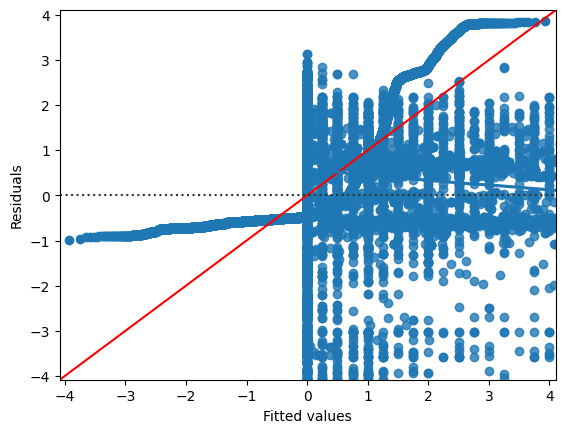

In [121]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot


coral_regression = ols('Percent_Bleaching ~ Temperature_Mean',data=coral).fit()
print(coral_regression.summary())

# coral_regression.resid.plot(kind='hist', bins=20, alpha=0.5)
# mse=coral_regression.mse_resid
# print(mse)
# rse=np.sqrt(mse)
# print(rse)

qqplot(coral_regression.resid, fit=True,line="45")
sns.residplot(x="Percent_Bleaching", y="Temperature_Mean", data=coral, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")



In [122]:

#model_norm_residuals= coral_regression.get_influence().resid_studentized_internal
#summary_influence=coral_regression.get_influence().summary_frame()
influence=summary_influence["cooks_d"]
summary_influence["standard_resid"]
summary_influence["dffits_internal"]
summary_influence["dffits"]
summary_influence["student_resid"]
leverage=summary_influence["hat_diag"]
summary_influence.sort_values(by="hat_diag",ascending=False)
# model_norm_residuals_abs = np.sqrt(np.abs(model_norm_residuals))
# sns.regplot(x=coral_regression.fittedvalues, y=model_norm_residuals_abs, ci=None, lowess=True)
# plt.xlabel("Fitted values")
# plt.ylabel("Sqrt of abs val of stdized residuals")

#sns.regplot(data=coral,x="Temperature_Mean", y="Percent_Bleaching", ci=None,line_kws={'color':'red'})

NameError: name 'summary_influence' is not defined

9.15385
9.619464870346224


<Axes: xlabel='SSTA', ylabel='Percent_Bleaching'>

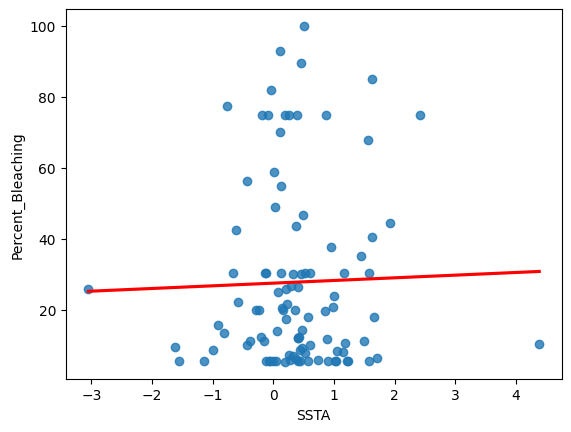

In [ ]:
print(coral.sample(400,replace=True)['Percent_Bleaching'].mean())
print(coral['Percent_Bleaching'].mean())
mean_reg=[]
for _ in range(1000):
    mean_reg.append(coral.sample(400,replace=True)['Percent_Bleaching'].mean())

np.mean(mean_reg)

coral_out=coral[coral['Percent_Bleaching']>5]
coral_sampled=coral_out.sample(100,replace=True)

sns.regplot(data=coral_sampled,x="SSTA", y="Percent_Bleaching", ci=None,line_kws={'color':'red'})

<Axes: xlabel='Cyclone_Frequency', ylabel='ClimSST'>

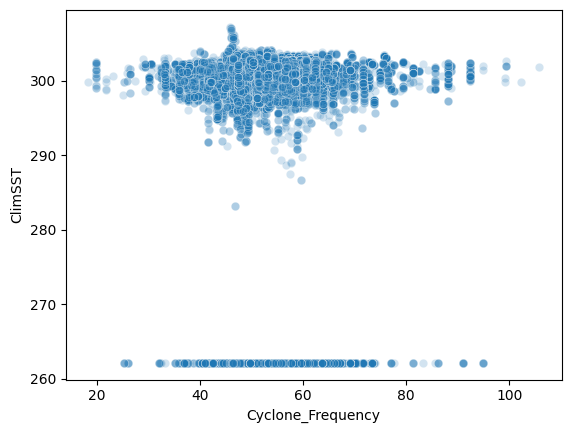

In [ ]:
bleached_coral=coral[(coral['Percent_Bleaching']>80) & (coral['Percent_Bleaching']<90)]
#Cyclone_Frequency, 
#bleached_coral_sampled=bleached_coral.sample(100,replace=True)
#sns.scatterplot(x='Cyclone_Frequency', y='Depth_m', data=bleached_coral, alpha=0.2)
sns.scatterplot(x='Cyclone_Frequency', y='ClimSST', data=coral, alpha=0.2)

Sample_ID  Cyclone_Frequency  Depth_m  ClimSST Ocean_Name  \
0       10324336              49.90    10.00   301.61   Atlantic   
1       10324754              51.20    14.00   262.15    Pacific   
2       10323866              61.52     7.00   298.79   Atlantic   
3       10328028              65.39     9.02   300.16   Atlantic   
4       10328029              65.39    12.50   300.15   Atlantic   
...          ...                ...      ...      ...        ...   
35040   10318964              85.57     3.00   300.97   Atlantic   
35041   10318964              85.57     3.00   300.97   Atlantic   
35042   10290574              35.71    14.00   301.58     Indian   
35043   10274702              58.42     4.00   299.79   Atlantic   
35044   10275554              62.54     4.00   298.32   Atlantic   

           Country_Name  Distance_to_Shore   Exposure  Turbidity Date_Year  \
0                  Cuba            8519.23    Exposed     0.0287      2005   
1      French Polynesia            1431.62    Exposed     0.0262      1991   
2        United Kingdom             182.33    Exposed     0.0429      2006   
3         United States             313.13    Exposed     0.0424      2006   
4         United States             792.00    Exposed     0.0424      2006   
...                 ...                ...        ...        ...       ...   
35040     United States              49.16  Sheltered     0.0586      2005   
35041     United States              49.16  Sheltered     0.0586      2005   
35042        Madagascar            8768.03  Sometimes     0.0628      2016   
35043     United States            8170.00    Exposed     0.1203      2015   
35044     United States            1863.00  Sheltered     0.1703      2015   

      Bleaching_Level  Temperature_Maximum  SSTA   TSA  Percent_Bleaching  \
0              Colony               304.69 -0.46 -0.80               50.2   
1              Colony               305.01  1.29  1.29               50.7   
2              Colony               304.14  0.04 -2.64               50.9   
3              Colony               304.07 -0.07 -2.27               50.9   
4              Colony               303.76  0.00 -2.19               50.9   
...               ...                  ...   ...   ...                ...   
35040      Population               303.67  0.32  0.21              100.0   
35041      Population               303.67  0.32  0.21              100.0   
35042          Colony               305.32  0.63  0.59              100.0   
35043          Colony               306.04  3.91  3.91              100.0   
35044          Colony               306.82  1.59 -0.57              100.0   

       Temperature_Mean            Realm_Name  Percent_Cover  
0                300.67     Tropical Atlantic          12.50  
1                300.73  Eastern Indo-Pacific          12.50  
2                300.32     Tropical Atlantic          12.50  
3                300.38     Tropical Atlantic          12.50  
4                300.38     Tropical Atlantic          12.50  
...                 ...                   ...            ...  
35040            300.34     Tropical Atlantic          28.75  
35041            300.34     Tropical Atlantic           5.62  
35042            301.26  Western Indo-Pacific          19.06  
35043            299.79     Tropical Atlantic          12.50  
35044            299.65     Tropical Atlantic          12.50  

[34515 rows x 18 columns]

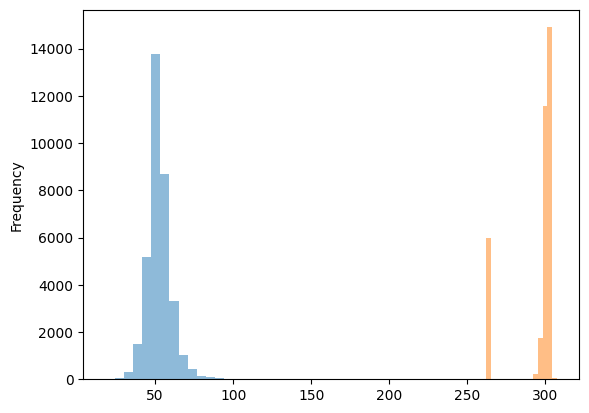

In [ ]:
coral['Cyclone_Frequency'].plot(kind='hist', bins=15, alpha=0.5)

coral['ClimSST'].plot(kind='hist', bins=15, alpha=0.5)
coral

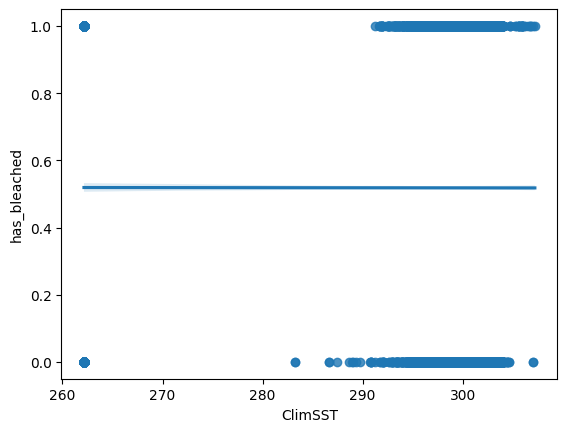

In [ ]:
from statsmodels.formula.api import logit
coral_logit=coral.copy()
#'has_bleached ~ Cyclone_Frequency+ClimSST+Temperature_Maximum'
coral_logit['has_bleached'] = coral_logit['Percent_Bleaching'].apply(lambda x: 1 if x > 0 else 0)

#model_logit=logit('has_bleached ~ ClimSST',data=coral_logit).fit()
sns.regplot(x='ClimSST', y='has_bleached', data=coral_logit, logistic=True)

#explanatory_data = pd.DataFrame({"cycloned": np.linspace(20, 80, 200)})
#prediction_data = explanatory_data.assign(has_churned = model_logit.predict(explanatory_data))

conf_matrix = model_logit.pred_table()



In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

print(conf_matrix)
mosaic(conf_matrix)
conf_matrix[1,0]

0.0

/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_73630/2318234025.py:1: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  coral_temp=pd.read_csv('/users/mehr/desktop/data/coral.csv')


<Axes: xlabel='Percent_Bleaching', ylabel='SSTA_Frequency'>

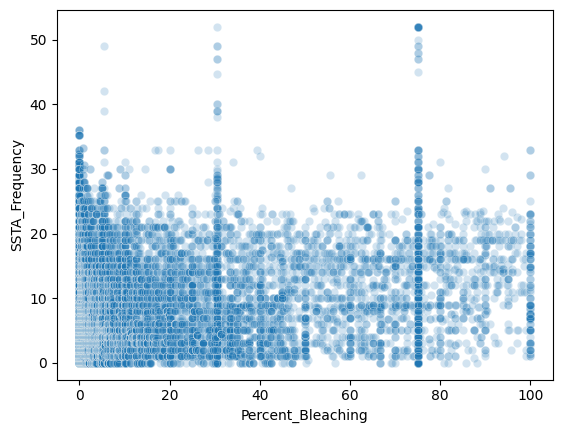

In [ ]:
coral_temp=pd.read_csv('/users/mehr/desktop/data/coral.csv')
coral_temp['SSTA_Frequency'] = coral_temp['SSTA_Frequency'].replace('nd', pd.NA)
coral_temp['SSTA_Frequency'] = coral_temp['SSTA_Frequency'].dropna()
coral_temp['SSTA_Frequency'] = coral_temp['SSTA_Frequency'].astype(float)

#coral_temp['SSTA_Frequency'].plot(kind='hist', bins=15, alpha=0.5)

coral_temp['Percent_Bleaching'] = coral_temp['Percent_Bleaching'].replace('nd', pd.NA)
coral_temp=coral_temp.dropna()

coral_temp['Percent_Bleaching'] = coral_temp['Percent_Bleaching'].astype(float)

sns.scatterplot(x='Percent_Bleaching', y='SSTA_Frequency', data=coral_temp, alpha=0.2)



(array([   2.,   23.,   94.,  297.,  688., 1301., 1771., 1994., 1724.,
        1137.,  628.,  243.,   67.,   28.,    3.]),
 array([ 9.2146206 ,  9.26915235,  9.3236841 ,  9.37821585,  9.4327476 ,
         9.48727935,  9.5418111 ,  9.59634285,  9.6508746 ,  9.70540635,
         9.75993809,  9.81446984,  9.86900159,  9.92353334,  9.97806509,
        10.03259684]),
 <BarContainer object of 15 artists>)

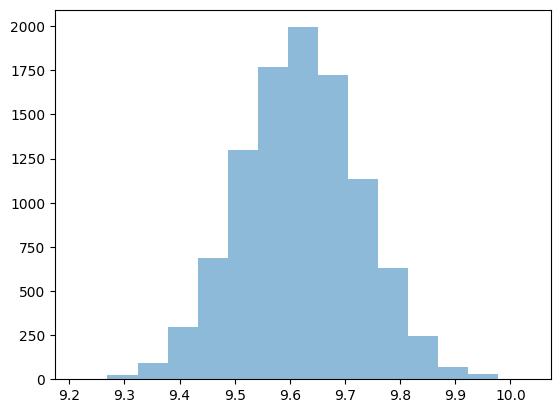

In [ ]:
mean_flavors_1000 = []
for i in range(10000):
    mean_flavors_1000.append(np.mean(coral.sample(frac=1, replace=True)['Percent_Bleaching']))
    
plt.hist(mean_flavors_1000,bins=15, alpha=0.5)


In [ ]:
coral.head(2)

Sample_ID  Cyclone_Frequency  Depth_m  ClimSST Ocean_Name  \
0   10324336               49.9     10.0   301.61   Atlantic   
1   10324754               51.2     14.0   262.15    Pacific   

       Country_Name  Distance_to_Shore Exposure  Turbidity Date_Year  \
0              Cuba            8519.23  Exposed     0.0287      2005   
1  French Polynesia            1431.62  Exposed     0.0262      1991   

  Bleaching_Level  Temperature_Maximum  SSTA   TSA  Percent_Bleaching  \
0          Colony               304.69 -0.46 -0.80               50.2   
1          Colony               305.01  1.29  1.29               50.7   

   Temperature_Mean            Realm_Name  Percent_Cover  bleached  
0            300.67     Tropical Atlantic           12.5         1  
1            300.73  Eastern Indo-Pacific           12.5         1

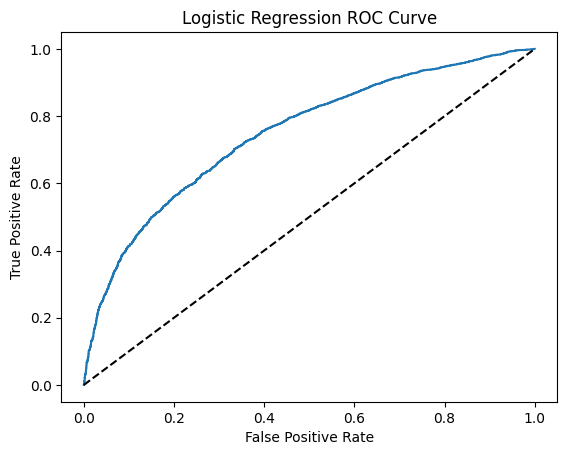

the roc_auc_score :  0.7485765945502585


AttributeError: 'AdaBoostClassifier' object has no attribute 'items'

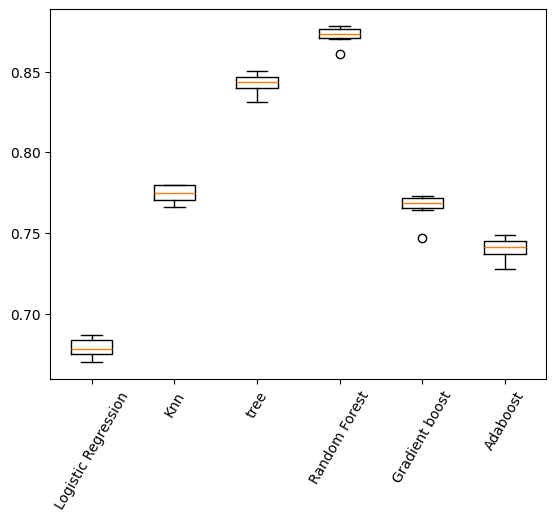

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier



coral['bleached']=np.where(coral['Percent_Bleaching']>0,1,0)
coral['bleached'].value_counts(normalize=True)

X=coral.select_dtypes(include=['number'])
X=X.drop(columns=['bleached','Percent_Bleaching','Sample_ID'])
y=coral['bleached']


country_dum=pd.get_dummies(coral['Ocean_Name'],drop_first=True)
X=pd.concat([country_dum,X],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log=LogisticRegression()

scaler=StandardScaler()
X_train_SS=scaler.fit_transform(X_train)
X_test_SS=scaler.transform(X_test)

log.fit(X_train_SS,y_train)
#print(log.score(X_test,y_test))
y_pred=log.predict(X_test_SS)
#print(classification_report(y_test,y_pred))
proba=log.predict_proba(X_test_SS)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,proba)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print("the roc_auc_score : ",roc_auc_score(y_test,proba))

models={'Logistic Regression': LogisticRegression(),
        "Knn": KNeighborsClassifier(n_neighbors=5),
        "tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient boost":GradientBoostingClassifier(),
        "Adaboost":AdaBoostClassifier()}
results=[]
for model in models.values():
    kf=KFold(n_splits=8,shuffle=True,random_state=42)
    cv_results=cross_val_score(model,X_train_SS,y_train,cv=kf)
    results.append(cv_results)
    
plt.boxplot(results,labels=models.keys())
plt.xticks(rotation=60)


for name , model  in model.items():
    model.fit(X_train_SS,y_train)
    y_pred=model.predict(X_test_SS)
    print(f"the {model} scoe is {model.score(X_test_SS,y_test)}")

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier,Ridge,Lasso
from sklearn.model_selection import KFold,cross_val_score


kf=KFold(n_splits=5,shuffle=True)
param_grid={'alpha':np.arange(0.0001, 1, 10),
            'solver':['lsqr','sag']}


rsc=RandomizedSearchCV(Ridge(),param_grid,cv=kf,n_iter=10)
rsc.fit(X_train_SS,y_train)
print("best params: ",rsc.best_params_, "best scores:", rsc.best_score_)

gsr=GridSearchCV(Ridge(),param_grid=param_grid,cv=kf)
gsr.fit(X_train_SS,y_train)


print("best params: ",gsr.best_params_, "best scores:", gsr.best_score_)
print("score: ",gsr.score(X_test_SS,y_test))
print("score: ",rsc.score(X_test_SS,y_test))

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best params:  {'solver': 'sag', 'alpha': 0.0001} best scores: 0.17252836825622814
best params:  {'alpha': 0.0001, 'solver': 'sag'} best scores: 0.17249965302862205
score:  0.17900079080523146
score:  0.179000572997272


In [ ]:
dum=pd.get_dummies(coral['Ocean_Name'],drop_first=True)
from sklearn.preprocessing import OneHotEncoder
print(dum.columns)
dum

pd.get_dummies(coral['Country_Name'],drop_first=True)
#OneHotEncoder().fit_transform(coral['Country_Name'].values.reshape(-1,1)).toarray()

CategoricalIndex(['Atlantic', 'Indian', 'Pacific', 'Red Sea'], categories=['Arabian Gulf', 'Atlantic', 'Indian', 'Pacific', 'Red Sea'], ordered=False, dtype='category')


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#
climsst_cleaned=coral[coral['ClimSST']!=262.15]
coral.select_dtypes(include=['number'])

Sample_ID  Cyclone_Frequency  Depth_m  ClimSST  Distance_to_Shore  \
0       10324336              49.90    10.00   301.61            8519.23   
1       10324754              51.20    14.00   262.15            1431.62   
2       10323866              61.52     7.00   298.79             182.33   
3       10328028              65.39     9.02   300.16             313.13   
4       10328029              65.39    12.50   300.15             792.00   
...          ...                ...      ...      ...                ...   
35040   10318964              85.57     3.00   300.97              49.16   
35041   10318964              85.57     3.00   300.97              49.16   
35042   10290574              35.71    14.00   301.58            8768.03   
35043   10274702              58.42     4.00   299.79            8170.00   
35044   10275554              62.54     4.00   298.32            1863.00   

       Turbidity  Temperature_Maximum  SSTA   TSA  Percent_Bleaching  \
0         0.0287               304.69 -0.46 -0.80               50.2   
1         0.0262               305.01  1.29  1.29               50.7   
2         0.0429               304.14  0.04 -2.64               50.9   
3         0.0424               304.07 -0.07 -2.27               50.9   
4         0.0424               303.76  0.00 -2.19               50.9   
...          ...                  ...   ...   ...                ...   
35040     0.0586               303.67  0.32  0.21              100.0   
35041     0.0586               303.67  0.32  0.21              100.0   
35042     0.0628               305.32  0.63  0.59              100.0   
35043     0.1203               306.04  3.91  3.91              100.0   
35044     0.1703               306.82  1.59 -0.57              100.0   

       Temperature_Mean  Percent_Cover  
0                300.67          12.50  
1                300.73          12.50  
2                300.32          12.50  
3                300.38          12.50  
4                300.38          12.50  
...                 ...            ...  
35040            300.34          28.75  
35041            300.34           5.62  
35042            301.26          19.06  
35043            299.79          12.50  
35044            299.65          12.50  

[34515 rows x 12 columns]

9.619464870346224


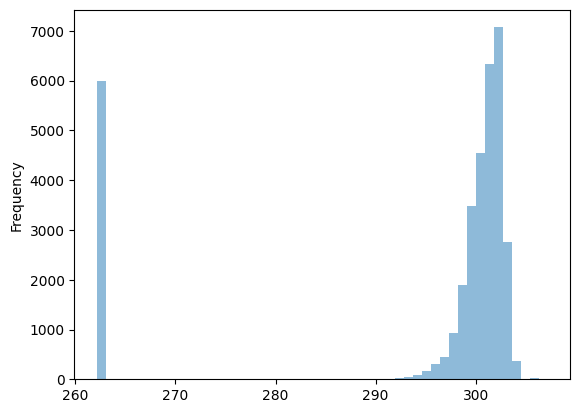

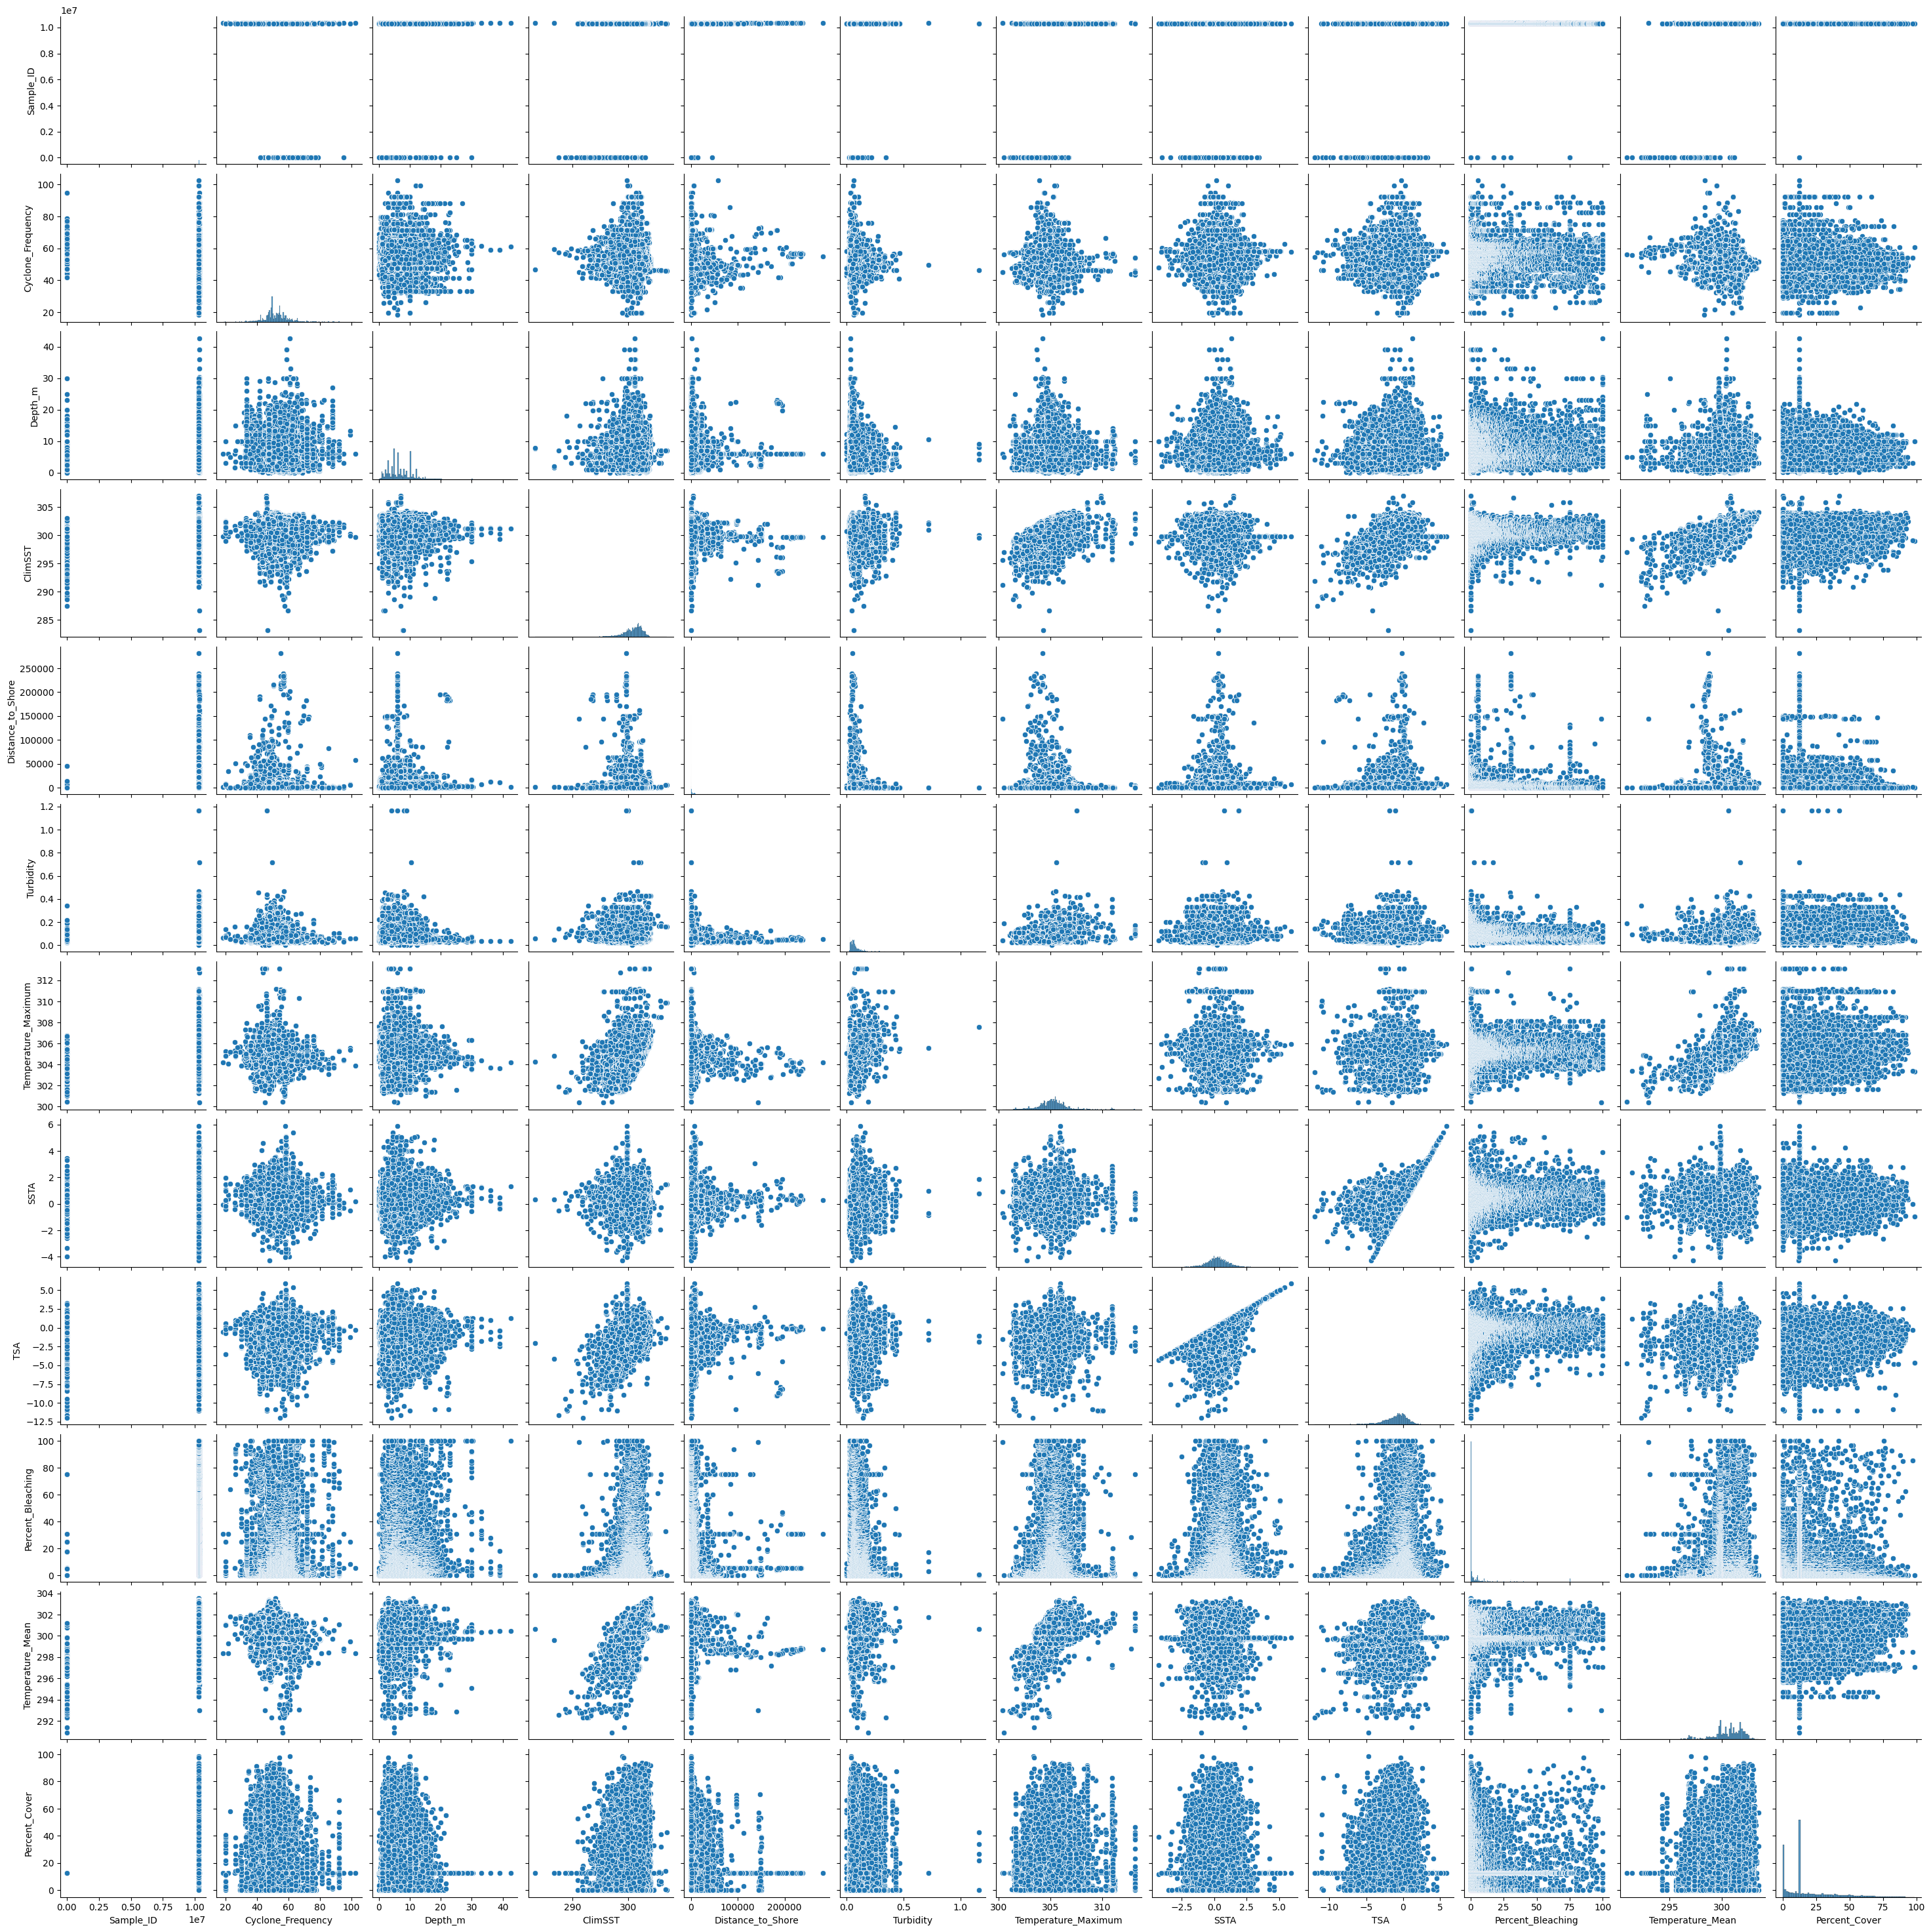

In [ ]:
coral['ClimSST'].value_counts(normalize=True)
print(coral['Percent_Bleaching'].mean())
coral[coral['ClimSST']==262.15].aggregate({'Cyclone_Frequency':'mean','Depth_m':'mean','Distance_to_Shore':'mean','Turbidity':'mean','Temperature_Maximum':'mean','Temperature_Mean':'mean','Percent_Cover':'mean','Percent_Bleaching':'mean'})

coral['ClimSST'].plot(kind='hist', bins=50, alpha=0.5)
coral['ClimSST'].describe()

climsst_cleaned=coral[coral['ClimSST']!=262.15]
climsst_cleaned=climsst_cleaned[climsst_cleaned['Date_Year'].astype('int')>2000]
sns.pairplot(climsst_cleaned.select_dtypes(include=['number']))


coral['ClimSST'].plot(kind='hist', bins=50, alpha=0.5)

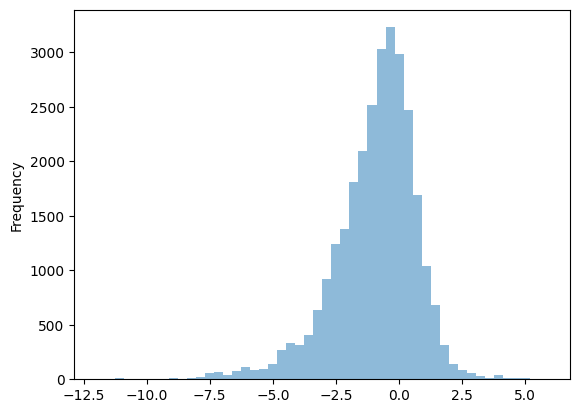

<Axes: ylabel='TSA'>

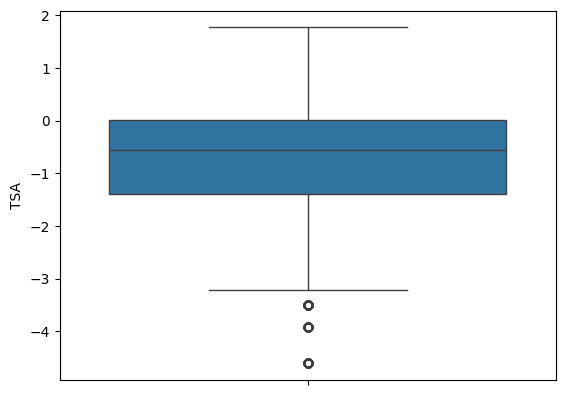

In [ ]:
import warnings as wr 
wr.filterwarnings('ignore')


#pd.concat([climsst_cleaned[['ClimSST','Temperature_Maximum']],climsst_minus])


climsst_cleaned['difference']=climsst_cleaned['ClimSST']-climsst_cleaned['TSA']
climsst_cleaned[['ClimSST','TSA','difference']]
#climsst_cleaned['difference'].plot(kind='hist', bins=50, alpha=0.5)
climsst_cleaned[['ClimSST','TSA','difference']]
climsst_cleaned['TSA'].plot(kind='hist', bins=50, alpha=0.5)
plt.show()
#climsst_cleaned['TSA'].plot(kind='box')
sns.boxplot(np.log(climsst_cleaned['TSA']))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import statsmodels.formula.api as smf

climsst_cleaned=coral[coral['ClimSST']!=262.15]

def bootstrap_slr(data, mod_formula, rep):
    coef_table = []
    for _ in range(rep):
        data_boot = resample(data, replace=True)
        lm_boot = smf.ols(formula=mod_formula, data=data_boot).fit()
        coef_table.append(lm_boot.params)
    return pd.DataFrame(coef_table)

lm_500=bootstrap_slr(climsst_cleaned, 'TSA~ClimSST', 500)
print(lm_500.describe())



        Intercept     ClimSST
count  500.000000  500.000000
mean  -152.067031    0.502176
std      2.096161    0.006955
min   -156.993550    0.480265
25%   -153.577416    0.497826
50%   -152.083692    0.502252
75%   -150.754482    0.507157
max   -145.466633    0.518553


Intercept   ClimSST
0   -150.452695  0.496799
1   -148.317163  0.489769
2   -152.647799  0.504122
3   -151.920477  0.501682
4   -156.490816  0.516855
..          ...       ...
495 -156.152421  0.515752
496 -153.405655  0.506639
497 -153.503865  0.506930
498 -155.717515  0.514275
499 -152.352882  0.503073

[500 rows x 2 columns]

<Axes: ylabel='Frequency'>

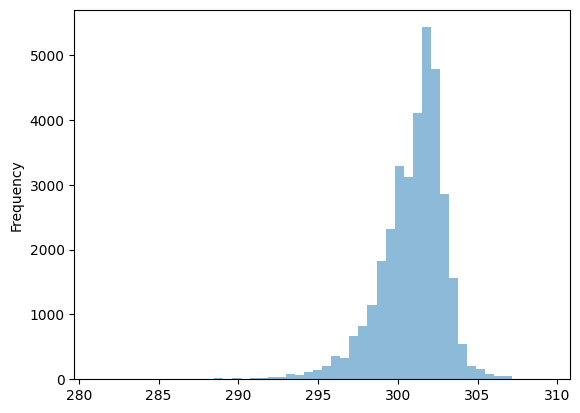

In [ ]:
climsst_outlier=coral[coral['ClimSST']==262.15]

climsst_outlier['ClimSST']= (climsst_outlier["TSA"] +151.999254)/0.501952

coral.loc[coral['ClimSST'] == 262.15, 'ClimSST'] = climsst_outlier['ClimSST']

coral['ClimSST'].plot(kind='hist', bins=50, alpha=0.5)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

coral=pd.read_csv('/users/mehr/desktop/data/coral_cleaned.csv')
coral['Sample_ID'].nunique()
coral['Sample_ID'].duplicated().value_counts()

# Filter the dataframe to include only duplicated Sample_ID values
duplicated_coral = coral[coral['Sample_ID'].duplicated()]

# Group the filtered dataframe by Sample_ID and Date_Year and count the occurrences
duplicated_counts = duplicated_coral.groupby(['Date_Year']).size().reset_index(name='Count')

# Find the two Date_Year values with the highest count of duplicated values
top_two_dates = duplicated_counts.groupby('Date_Year')['Count'].sum().nlargest(4).index.tolist()

# Print the two Date_Year values with the highest count of duplicated values
print("The two Date_Year values with the most duplicated values are:", top_two_dates)

duplicated_coral[duplicated_coral['Sample_ID']==10310527]
duplicated_counts.sort_values(by='Count',ascending=False)
dup_2010=duplicated_counts[duplicated_counts['Date_Year']==2010]
dup_2020=duplicated_counts[duplicated_counts['Date_Year']==2011]

import scipy.stats as stats

# Filter the duplicated_coral DataFrame for the years 2010 and 2019
duplicated_2010 = duplicated_coral[duplicated_coral['Date_Year'] == 2010]
duplicated_2019 = duplicated_coral[duplicated_coral['Date_Year'] == 2019]

# Extract the temperature mean values for the two years
temperature_mean_2010 = duplicated_2010['Temperature_Mean'].astype(float)
temperature_mean_2019 = duplicated_2019['Temperature_Mean'].astype(float)

# Perform the t-test
#t_statistic, p_value = stats.ttest_rel(temperature_mean_2010, temperature_mean_2019)

# Print the t-statistic and p-value
#print("T-Statistic:", t_statistic)
#print("P-Value:", p_value)

duplicated_2010_2019 = duplicated_2010[duplicated_2010['Sample_ID'].isin(duplicated_2019['Sample_ID'])]

#duplicated_2010_2019 = 
coral[coral['Sample_ID'].isin(coral['Sample_ID'])]

duplicated_counts


The two Date_Year values with the most duplicated values are: [2006, 2017, 2004, 2009]


Date_Year  Count
0        1998      5
1        2000      2
2        2001      4
3        2002     62
4        2003    609
5        2004    739
6        2005    690
7        2006    853
8        2007    651
9        2008    697
10       2009    702
11       2010    543
12       2011    543
13       2012    569
14       2013    642
15       2014    609
16       2015    630
17       2016    644
18       2017    791
19       2018    621
20       2019    593
21       2020     45

In [ ]:
from IPython.display import display
pd.options.display.max_columns = None
#display(df)

# Option 2: Use set_option
display(pd.read_csv('/users/mehr/desktop/data/coral.csv'))


/var/folders/vc/3kfwh15d7234657gp2jqxqj80000gn/T/ipykernel_65080/1267872336.py:6: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  display(pd.read_csv('/users/mehr/desktop/data/coral.csv'))


Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0         2501   10324336      Donner           23.1630           -82.5260   
1         3467   10324754      Donner          -17.5750          -149.7833   
2         1794   10323866      Donner           18.3690           -64.5640   
3         8647   10328028      Donner           17.7600           -64.5680   
4         8648   10328029      Donner           17.7690           -64.5830   
...        ...        ...         ...               ...                ...   
41356    15446   10310562  Reef_Check           -8.3651           116.0844   
41357    15456   10310527  Reef_Check           -8.3473           116.0503   
41358    15456   10310527  Reef_Check           -8.3473           116.0503   
41359    15457   10310536  Reef_Check           -8.3445           116.0629   
41360    15457   10310536  Reef_Check           -8.3445           116.0629   

      Ocean_Name                     Reef_ID            Realm_Name  \
0       Atlantic                          nd     Tropical Atlantic   
1        Pacific                          nd  Eastern Indo-Pacific   
2       Atlantic                          nd     Tropical Atlantic   
3       Atlantic                          nd     Tropical Atlantic   
4       Atlantic                          nd     Tropical Atlantic   
...          ...                         ...                   ...   
41356    Pacific       116.5.3.9E.8.21.54.4S  Central Indo-Pacific   
41357    Pacific       116.3.1.1E.8.20.50.2S  Central Indo-Pacific   
41358    Pacific       116.3.1.1E.8.20.50.2S  Central Indo-Pacific   
41359    Pacific  116.3.46.548E.8.20.40.236S  Central Indo-Pacific   
41360    Pacific  116.3.46.548E.8.20.40.236S  Central Indo-Pacific   

                                   Ecoregion_Name      Country_Name  \
0                         Cuba and Cayman Islands              Cuba   
1                Society Islands French Polynesia  French Polynesia   
2      Hispaniola Puerto Rico and Lesser Antilles    United Kingdom   
3      Hispaniola Puerto Rico and Lesser Antilles     United States   
4      Hispaniola Puerto Rico and Lesser Antilles     United States   
...                                           ...               ...   
41356           Lesser Sunda Islands and Savu Sea         Indonesia   
41357           Lesser Sunda Islands and Savu Sea         Indonesia   
41358           Lesser Sunda Islands and Savu Sea         Indonesia   
41359           Lesser Sunda Islands and Savu Sea         Indonesia   
41360           Lesser Sunda Islands and Savu Sea         Indonesia   

      State_Island_Province_Name        City_Town_Name  \
0                         Havana                Havana   
1                Society Islands                Moorea   
2         British Virgin Islands          Peter Island   
3              US Virgin Islands             St. Croix   
4              US Virgin Islands             St. Croix   
...                          ...                   ...   
41356         West Nusa Tenggara  North Lombok Regency   
41357         West Nusa Tenggara  North Lombok Regency   
41358         West Nusa Tenggara  North Lombok Regency   
41359         West Nusa Tenggara  North Lombok Regency   
41360         West Nusa Tenggara  North Lombok Regency   

                               Site_Name Distance_to_Shore   Exposure  \
0                               Puntilla           8519.23    Exposed   
1                                     nd           1431.62    Exposed   
2                          Coral Gardens            182.33    Exposed   
3                                   3219            313.13    Exposed   
4                                   3194             792.0    Exposed   
...                                  ...               ...        ...   
41356  Statue Garden - South of Gili Air             91.31  Sheltered   
41357                         Meno Slope            129.08  Sheltered   
41358                 

In [ ]:
coral.columns

Index(['Sample_ID', 'Cyclone_Frequency', 'Depth_m', 'ClimSST', 'Ocean_Name',
       'Country_Name', 'Distance_to_Shore', 'Exposure', 'Turbidity',
       'Date_Year', 'Bleaching_Level', 'Temperature_Maximum', 'SSTA', 'TSA',
       'Percent_Bleaching', 'Temperature_Mean', 'Realm_Name', 'Percent_Cover'],
      dtype='object')